In [3]:
from sys import stdout

import numpy as np
from numpy.polynomial.polynomial import Polynomial, polyfit
from sympy import symbols
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as _A  # imported for "side effects"

import heisenberg

## The parameters: Generating set and n

In [4]:
S1 = [np.array((0, 0, 0)),
      np.array((1, 0, 0)),
      np.array((1, 1, 0))]
S2 = [np.array((0, 0, 0)),
      np.array((0, 1, 0)),
      np.array((1, 1, 0))]
S_both = [np.array((0, 0, 0)),
          np.array((1, 1, 0))]
S = [np.array((0, 0, 0)),
     np.array((1, 0, 0)),
     np.array((0, 1, 0)),
     np.array((1, 1, 0))]

In [5]:
n = 8

## Experiments

In [42]:
S1_p_n = list(heisenberg.compute_h3_pn(S1, n))
S2_p_n = list(heisenberg.compute_h3_pn(S2, n))
S_both_p_n = list(heisenberg.compute_h3_pn(S_both, n))
p_n = list(heisenberg.compute_h3_pn(S, n))

In [66]:
plot_stuff = [
    (heisenberg.PlotForm.from_pt_set(S1_p_n), 'tomato'),     # tomato
    (heisenberg.PlotForm.from_pt_set(S2_p_n), 'navy'),  # lightblue
    (heisenberg.PlotForm.from_pt_set(S_both_p_n), 'green'),  # green
]

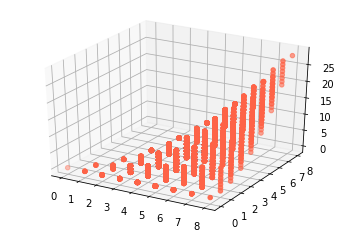

In [67]:
fig = plt.figure()
plotted_h3, color = plot_stuff[0]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

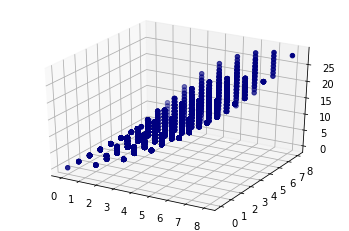

In [68]:
fig = plt.figure()
plotted_h3, color = plot_stuff[1]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

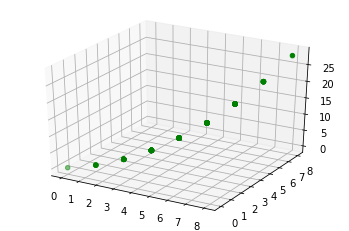

In [60]:
fig = plt.figure()
plotted_h3, color = plot_stuff[2]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

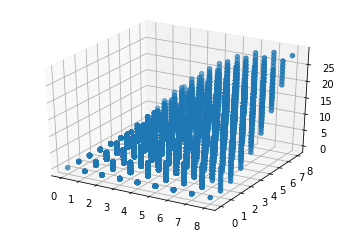

In [46]:
fig = plt.figure()
plotted_h3 = heisenberg.PlotForm.from_pt_set(p_n)
plotted_h3.plotme(fig)
plt.show(fig)

In [69]:
def plot_with_view_params(azim_, elev_=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for plotform, color in plot_stuff:
        ax.scatter(plotform.xs, plotform.ys, plotform.zs, color=color)
    ax.view_init(azim=azim_, elev=elev_)
    plt.show(fig)

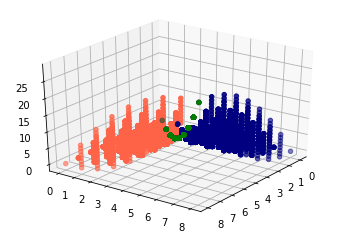

In [70]:
plot_with_view_params(36)

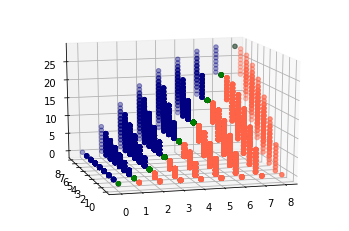

In [71]:
plot_with_view_params(-105, 15)

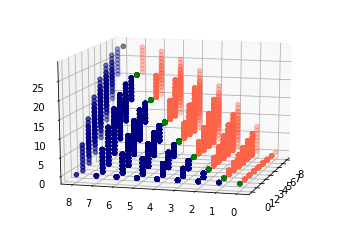

In [72]:
plot_with_view_params(-165, 15)

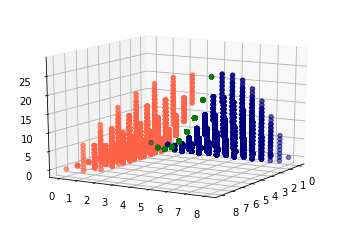

In [73]:
plot_with_view_params(30, 15)

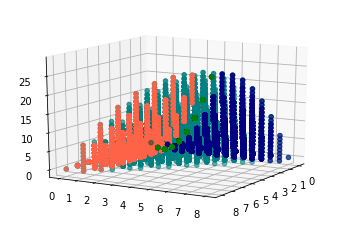

In [76]:
# Now let's also plot the points that are in the full point cloud but not in the smaller two.
AZIM = 30
ELEV = 15

plotted_other = heisenberg.PlotForm.from_pt_set(p_n)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plotted_other.xs, plotted_other.ys, plotted_other.zs, color='teal')
for plotform, color in plot_stuff:
    ax.scatter(plotform.xs, plotform.ys, plotform.zs, color=color)
ax.view_init(azim=AZIM, elev=ELEV)
plt.show(fig)

### Plots in the plane

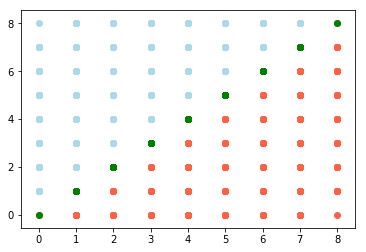

In [39]:
for plotform, color in plot_stuff:
    plt.scatter(plotform.xs, plotform.ys, color=color)
plt.show()

Now with the line $x + y = n$:

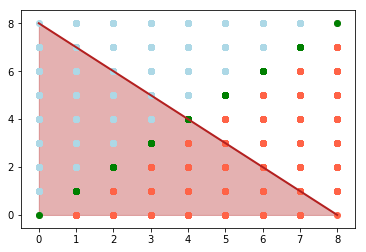

In [41]:
LINE_COLOR = (0.7, 0.125, 0.125, 1)
SHADING_COLOR = (0.7, 0.125, 0.125, 0.35)

line_x = (0, n)
line_y = (n, 0)
plt.fill_between((0, n), line_y, color=SHADING_COLOR)
plt.plot(line_x, line_y, c=LINE_COLOR, lw=2)
for plotform, color in plot_stuff:
    plt.scatter(plotform.xs, plotform.ys, color=color)
plt.show()

## Counting functions
Well... it's easy to see that $S_1 \cap S_2$ should give $|P_n(S_1 \cap S_2)| = n + 1$, since it's just the zero tuple and something else. You can choose to take any number of nonzero tuples from 0 to n, and the number of nonzero tuples is all that matters, so there are $n + 1$ possible output tuples. So, $|P_n(S_1 \cap S_2)| = n+1$. What about the other two? Do they combine in some nice way to give the points of $P_n$? Or at least the *number* of points in $P_n$?

Let's try and fit quartic polynomials to the number of points in the other two pieces -- the $S_1$ piece and the $S_2$ piece. Hopefully something nice will come out of that. As a reminder, our polynomial for $S$ is

$$\left|P_n\right| = \frac{1}{6}n^4 + \frac{1}{6}n^3 + \frac{5}{6}n^2 + \frac{11}{6}n + 1.$$

In [6]:
# S_1
POLYNOMIAL_MAX_COMBINATION_SIZE = 10
POLYNOMIAL_DEGREE = 4

P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(S1, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

In [7]:
# S_2
POLYNOMIAL_MAX_COMBINATION_SIZE = 10
POLYNOMIAL_DEGREE = 4

P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(S2, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

Interesting. It looks like they have the same number of points. That makes sense -- they look symmetric. It looks like each piece satisfies

$$|P_n(S_1)| = |P_n(S_2)| = \frac{1}{24}n^4 + \frac{1}{12}n^3 + \frac{11}{24}n^2 + \frac{17}{12}n + 1.$$

This means that the union of the point clouds has...

\begin{align}
|P_n(S_1) \cup P_n(S_2)| &= |P_n(S_1)| + |P_n(S_2)| - |P_n(S_1) \cap P_n(S_2)|  \\
                         &= 2|P_n(S_1)| - (n + 1) \\
                         &= \frac{1}{12}n^4 + \frac{1}{6}n^3 + \frac{11}{12}n^2 + \frac{11}{6}n + 1.
\end{align}

But we have

\begin{align}
|P_n(S)| - |P_n(S_1) \cup P_n(S_2)| &= \frac{1}{12}n^4 - \frac{1}{12}n^2 \\
                                    &= \frac{1}{12}n^2(n^2 - 1)
\end{align}

# Tetrahedron experiments

In [13]:
TS1 = [np.array((0, 0, 0)),
       np.array((1, 0, 0)),
       np.array((0, 1, 0))]
TS2 = [np.array((1, 0, 0)),
       np.array((0, 1, 0)),
       np.array((0, 0, 1))]
TS_both = [np.array((1, 0, 0)),
           np.array((0, 1, 0))]
TS = [np.array((0, 0, 0)),
      np.array((1, 0, 0)),
      np.array((0, 1, 0)),
      np.array((0, 0, 1))]

In [14]:
tn = 8

## Experiments

In [10]:
TS1_p_n = list(heisenberg.compute_h3_pn(TS1, tn))
TS2_p_n = list(heisenberg.compute_h3_pn(TS2, tn))
TS_both_p_n = list(heisenberg.compute_h3_pn(TS_both, tn))
TS_p_n = list(heisenberg.compute_h3_pn(TS, tn))

In [15]:
T_plot_stuff = [
    (heisenberg.PlotForm.from_pt_set(TS1_p_n), 'tomato'),     # tomato
    (heisenberg.PlotForm.from_pt_set(TS2_p_n), 'navy'),  # lightblue
    (heisenberg.PlotForm.from_pt_set(TS_both_p_n), 'green'),  # green
]

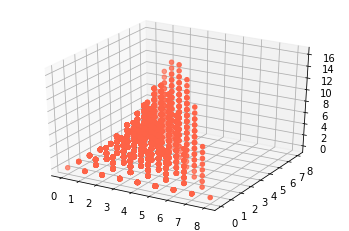

In [16]:
fig = plt.figure()
plotted_h3, color = T_plot_stuff[0]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

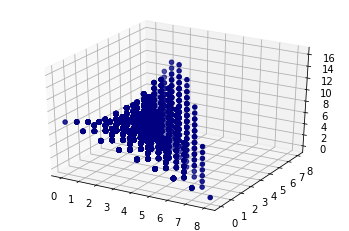

In [17]:
fig = plt.figure()
plotted_h3, color = T_plot_stuff[1]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

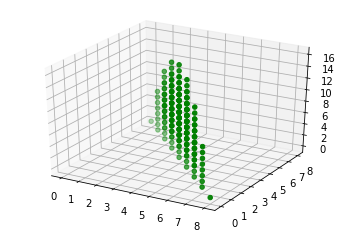

In [46]:
fig = plt.figure()
plotted_h3, color = T_plot_stuff[2]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

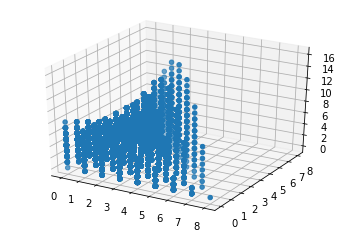

In [19]:
fig = plt.figure()
plotted_h3 = heisenberg.PlotForm.from_pt_set(TS_p_n)
plotted_h3.plotme(fig)
plt.show(fig)

In [22]:
def plot_with_view_params(azim_, elev_=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for plotform, color in T_plot_stuff:
        ax.scatter(plotform.xs, plotform.ys, plotform.zs, color=color)
    ax.view_init(azim=azim_, elev=elev_)
    plt.show(fig)

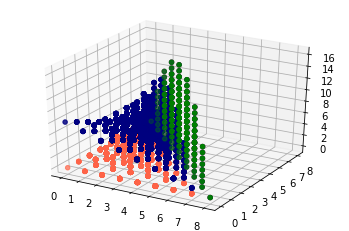

In [27]:
plot_with_view_params(-60)

## Counting functions
Let's fit some polynomials! This time for all three pieces! I won't be able to check the difference right now (2019-10-02) because I don't remember the counting function for the Heisenberg tetrahedron. I'll have to ask Angela or Sean later. Or look at our notes.

In [28]:
POLYNOMIAL_MAX_COMBINATION_SIZE = 10
POLYNOMIAL_DEGREE = 4

In [29]:
# TS_1
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS1, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

In [30]:
# TS_2
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS2, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

In [54]:
[(k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS2, k))), (k**4 + 2*k**3 + 11*k**2 + 34*k + 24)//24)
 for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]

[(1, 3, 3),
 (2, 7, 7),
 (3, 15, 15),
 (4, 30, 30),
 (5, 56, 56),
 (6, 98, 98),
 (7, 162, 162),
 (8, 255, 255),
 (9, 385, 385),
 (10, 561, 561)]

In [45]:
# TS_both
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS_both, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.00000000e+00, 8.33333333e-01, 2.05391260e-14, 1.66666667e-01,
       7.31385157e-16])

In [53]:
[(k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS_both, k))), (k**3 + 5*k + 6)//6)
 for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]

[(1, 2, 2),
 (2, 4, 4),
 (3, 8, 8),
 (4, 15, 15),
 (5, 26, 26),
 (6, 42, 42),
 (7, 64, 64),
 (8, 93, 93),
 (9, 130, 130),
 (10, 176, 176)]

In [32]:
# TS
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.75      , 0.95833333, 0.25      , 0.04166667])

In [57]:
[(k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS, k))), (k**4 + 6*k**3 + 23*k**2 + 42*k + 24)//24)
 for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]

[(1, 4, 4),
 (2, 11, 11),
 (3, 25, 25),
 (4, 50, 50),
 (5, 91, 91),
 (6, 154, 154),
 (7, 246, 246),
 (8, 375, 375),
 (9, 550, 550),
 (10, 781, 781)]

In [33]:
[ (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS_both, k)))) for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]
    

[(1, 2),
 (2, 4),
 (3, 8),
 (4, 15),
 (5, 26),
 (6, 42),
 (7, 64),
 (8, 93),
 (9, 130),
 (10, 176)]

Okay, so...

$$|P_n(S)| = \frac{1}{24}n^4 + \frac{1}{4}n^3 + \frac{23}{24}n^2 + \frac{7}{4}n + 1.$$

We also have

\begin{align}
|P_n(S_1)| = |P_n(S_2)| &= \frac{1}{24}n^4 + \frac{1}{12}n^3 + \frac{11}{24}n^2 + \frac{17}{12}n + 1. \\
|P_n(S_1 \cap S_2)| &= 0n^4 + \frac{1}{6}n^3 + 0n^2 + \frac{5}{6}n + 1.
\end{align}

Note also that in general, we should have

$$|P_n(S_1 \cap S_2)| = |P_n(S_1) \cap P_n(S_2)|$$

This gives

\begin{align}
|P_n(S_1) \cup P_n(S_2)| &= |P_n(S_1)| + |P_n(S_2)| - |P_n(S_1) \cap P_n(S_2)| \\
                         &= 2|P_n(S_1)| - |P_n(S_1) \cap P_n(S_2)| \\
                         &= \frac{1}{12}n^4 + \frac{11}{12}n^2 + 2n.
\end{align}

In [42]:
# check my math for me...
N = symbols('N')
CPN_Si = N**4/24 + N**3/12 + 11*N**2/24 + 17*N/12 + 1
CPN_S1_S2 = N**3/6 + 5*N/6 + 1
2*CPN_Si - CPN_S1_S2

N**4/12 + 11*N**2/12 + 2*N + 1

Now we have

\begin{align}
|P_n(S)| - |P_n(S_1) \cup P_n(S_2)| &= -\frac{1}{24}n^4 + \frac{1}{4}n^3 + \frac{1}{24}n^2 - \frac{1}{4}n \\
                                    &= \frac{1}{24}n\left(-n^3 + 6n^2 + n - 6\right)
\end{align}

In [44]:
N = symbols('N')
CPN_Si_cup = N**4/12 + 11*N**2/12 + 2*N + 1
CPN_S = (N**4)/24 + N**3/4 + 23*N**2/24 + 7*N/4 + 1
CPN_S - CPN_Si_cup

-N**4/24 + N**3/4 + N**2/24 - N/4

# Miscellaneous/Notes

### Proof that $P_n$ of intersection is intersection of $P_n$ of pieces
**Prop.:**
$$P_n(S_1 \cap S_2) = P_n(S_1) \cap P_n(S_2).$$

**Proof:** First, let $t_1 \dotsm t_n \in P_n(S_1 \cap S_2)$. Then $t_1, \dots, t_n$ are in $S_1$ and in $S_2$, so $t_1 \dotsm t_n$ is in $P_n(S_1)$ and in $P_n(S_2)$.

Now let $t_1 \dotsm t_n \in P_n(S_1) \cap P_n(S_2)$. Then $t_1, \dots, t_n$ are in $S_1$ and in $S_2$, since the product is in both $P_n(S_1)$ and $P_n(S_2)$. But then $t_1, \dots, t_n$ are in $S_1 \cap S_2$, so $t_1 \dotsm t_n$ are in $P_n(S_1 \cap S_2)$.

Thus, $P_n(S_1 \cap S_2) = P_n(S_1) \cap P_n(S_2)$. $\square$